### Data Analytics II
1. Implement logistic regression using Python/R to perform classification on
Social_Network_Ads.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision,
Recall on the given dataset.

In [139]:
import numpy as np
import pandas as pd

In [140]:
df = pd.read_csv("Social_Network_Ads.csv")

In [141]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [142]:
df.shape

(400, 5)

In [143]:
df = df.drop(['User ID'],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [144]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [145]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Age'>

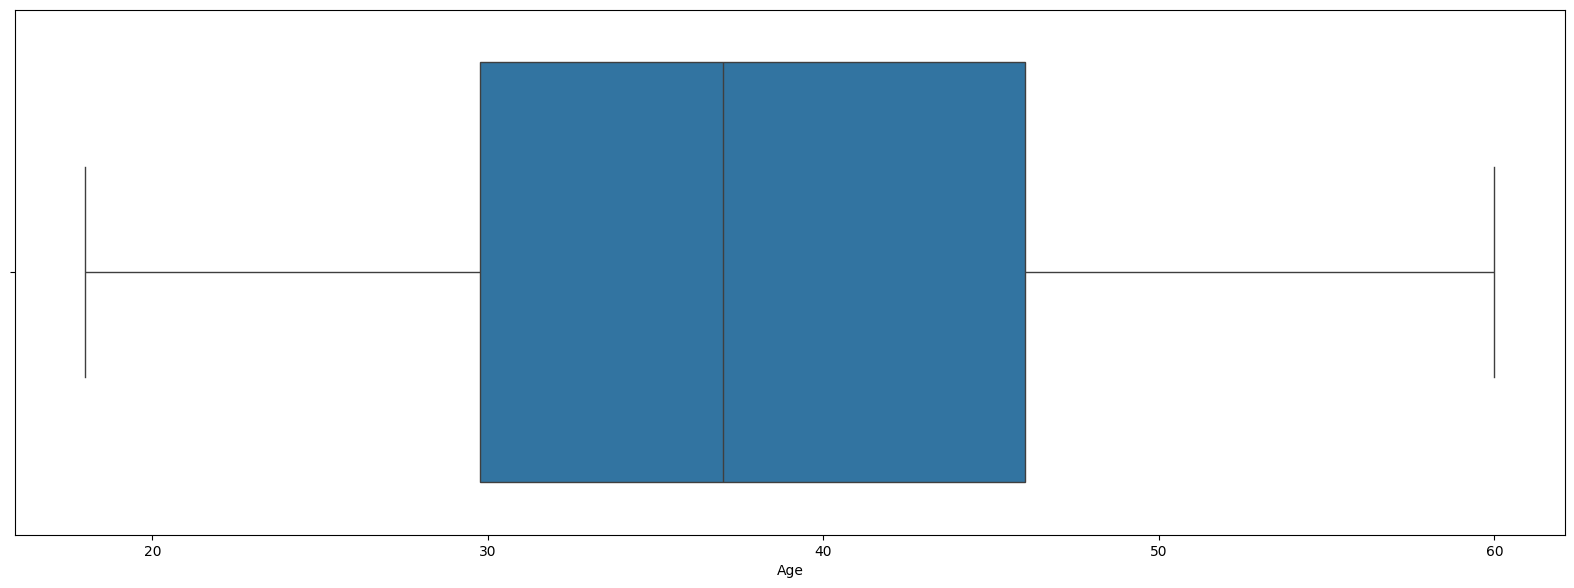

In [146]:
# Checking outliers
import matplotlib.pyplot as plt
import seaborn as sns
# Math score
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(data=df,x=df['Age'])

<Axes: xlabel='EstimatedSalary'>

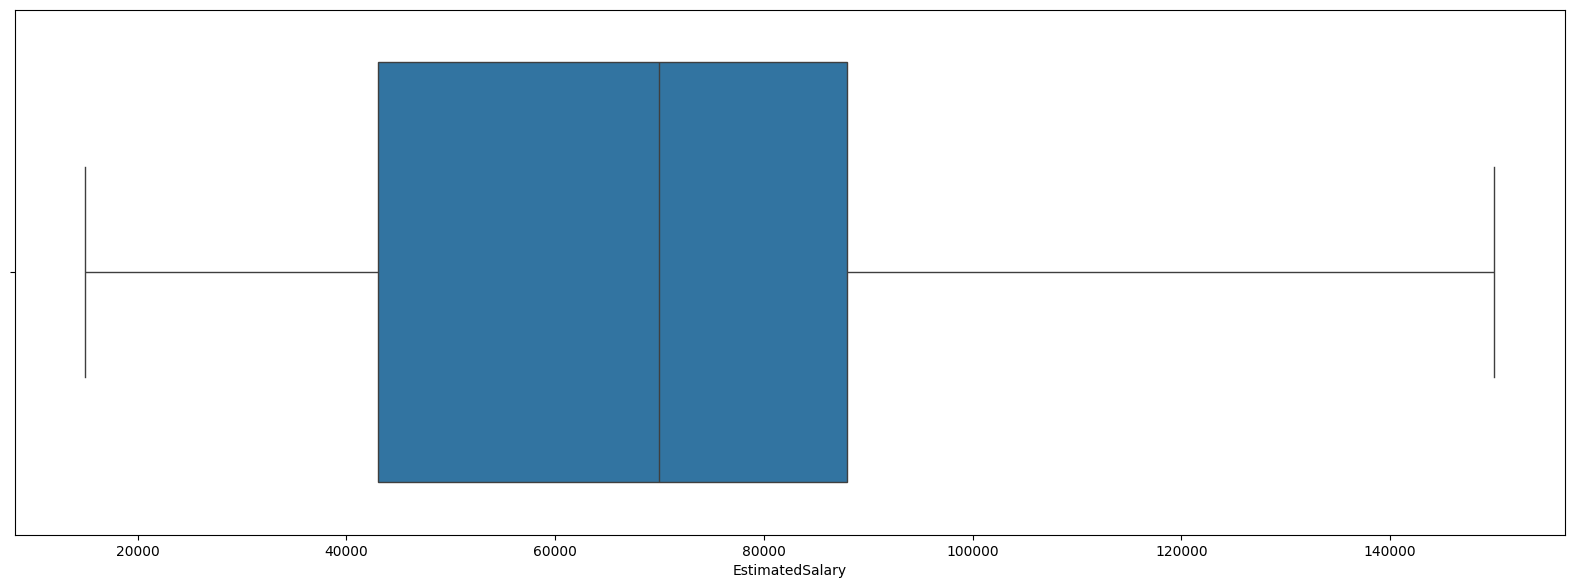

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
# Math score
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(data=df,x=df['EstimatedSalary'])

In [152]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [191]:
from sklearn.model_selection import train_test_split
x = df.drop(['Purchased'],axis=1)
y = df['Purchased']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [193]:
# Applying model 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=16)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [203]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[75,  3],
       [12, 30]])

In [204]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
meanAbsErr = mean_absolute_error(y_test,y_pred)
rootMeanSquErr = np.sqrt(mean_squared_error(y_test,y_pred))
meanSquErr = mean_squared_error(y_test,y_pred)
score = accuracy_score(y_test,y_pred)

In [205]:
score

0.875

In [206]:
tp = cnf_matrix[0][0]
fp = cnf_matrix[0][1]
fn = cnf_matrix[1][0]
tn = cnf_matrix[1][1]

print("true positive -" , tp)
print("false positive -" , fp)
print("false negative -" , fn)
print("true negative -" , tn)

true positive - 75
false positive - 3
false negative - 12
true negative - 30


In [207]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [208]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [209]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91        78
           1       0.91      0.71      0.80        42

    accuracy                           0.88       120
   macro avg       0.89      0.84      0.85       120
weighted avg       0.88      0.88      0.87       120



RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

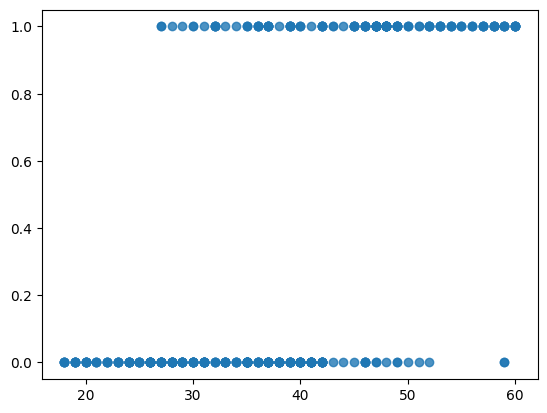

In [223]:
import seaborn as sns
sns.regplot(x='Age', y='Purchased', data=df, logistic=True)